In [1]:
import numpy as np
from scipy import special
import netCDF4 as nc
import matplotlib.pyplot as plt
from util import fix_bounds

In [2]:
coarsePath= '/glade/work/adac/microHH/coarseData/'
coarse_finest = nc.Dataset(coarsePath+'coarse4x1026_Re1800.nc', 'r')
#coarse = nc.Dataset(coarsePath+'coarse4x2052_Re1800.nc', 'r')
#coarse = nc.Dataset(coarsePath+'coarse4x40104_Re1800.nc', 'r')

In [3]:
kmax = 32
zsize = 18.074844397670482
dz = zsize / kmax
z = np.linspace(0.5*dz, zsize-0.5*dz, kmax)
# print(z)
# z_coarse=np.array(coarse_finest.variables["z"])
# #z_coarse=np.array(coarse.variables["z"])
# print(z_coarse)

In [16]:
itimeInit = 0
u_interp,z_interp = fix_bounds('u',coarse_finest,itimeInit,noslip=True,fix_bad_pad=True)
v_interp,_ = fix_bounds('v',coarse_finest,itimeInit,noslip=True,fix_bad_pad=False)
b_interp,_ = fix_bounds('b',coarse_finest,itimeInit,fix_bad_pad=False)

In [17]:
itimeFinal = 14
ul_interp,_ = fix_bounds('u',coarse_finest,itimeFinal,noslip=True,fix_bad_pad=True)
vl_interp,_ = fix_bounds('v',coarse_finest,itimeFinal,noslip=True,fix_bad_pad=False)
bl_interp,_ = fix_bounds('b',coarse_finest,itimeFinal,fix_bad_pad=False)

In [18]:
u = np.interp(z,z_interp,u_interp)
v = np.interp(z,z_interp,v_interp)
b = np.interp(z,z_interp,b_interp)
ul = np.interp(z,z_interp,ul_interp)
vl = np.interp(z,z_interp,vl_interp)
bl = np.interp(z,z_interp,bl_interp)
ug = np.zeros(kmax)
vg = np.zeros(kmax)
ug[:] = 0.049295030175465
vg[:] = 0.

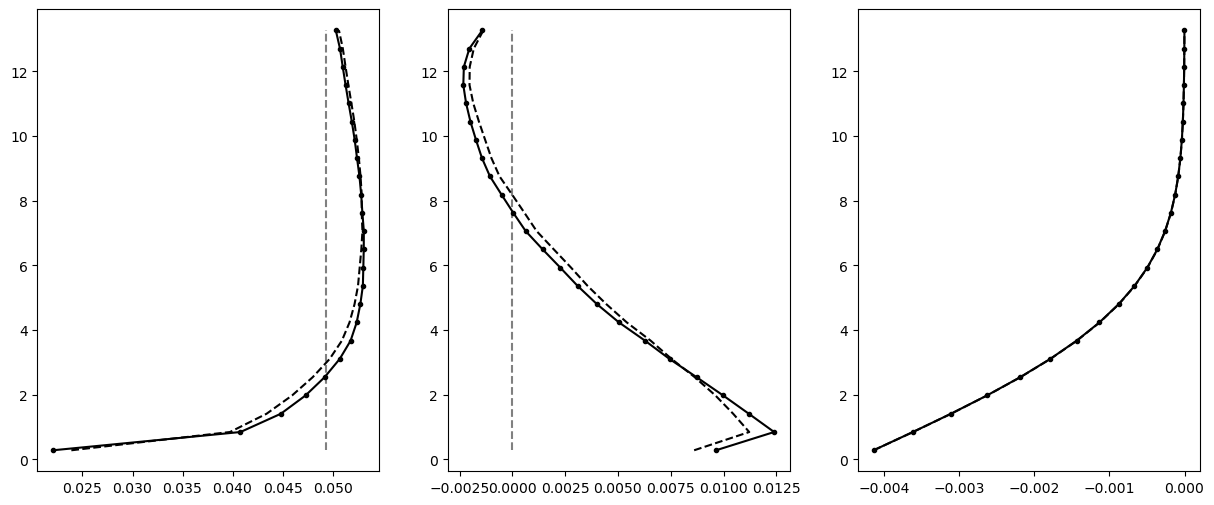

In [41]:
zstart=0
zend=int(3*kmax/4)

# del(fig,ax)
fig,ax = plt.subplots(1,3,figsize = (15,6))

ax[0].plot(ug[zstart:zend],z[zstart:zend],'--',color='grey',label=r'$u_g$')
ax[0].plot(u[zstart:zend],z[zstart:zend],'k--',label='DNS init.')
ax[0].plot(ul[zstart:zend],z[zstart:zend],'k.-',label='DNS final')

ax[1].plot(vg[zstart:zend],z[zstart:zend],'--',color='grey',label=r'$v_g$')
ax[1].plot(v[zstart:zend],z[zstart:zend],'k--',label='DNS init.')
ax[1].plot(vl[zstart:zend],z[zstart:zend],'k.-',label='DNS final')

ax[2].plot(b[zstart:zend],z[zstart:zend],'k--',label='DNS init.')
ax[2].plot(bl[zstart:zend],z[zstart:zend],'k.-',label='DNS final')


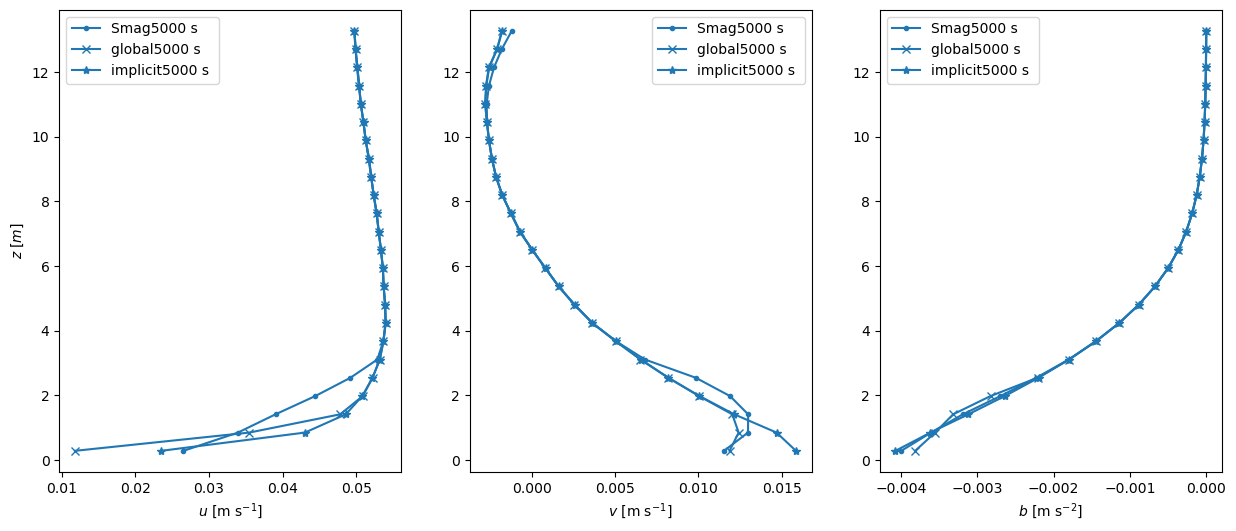

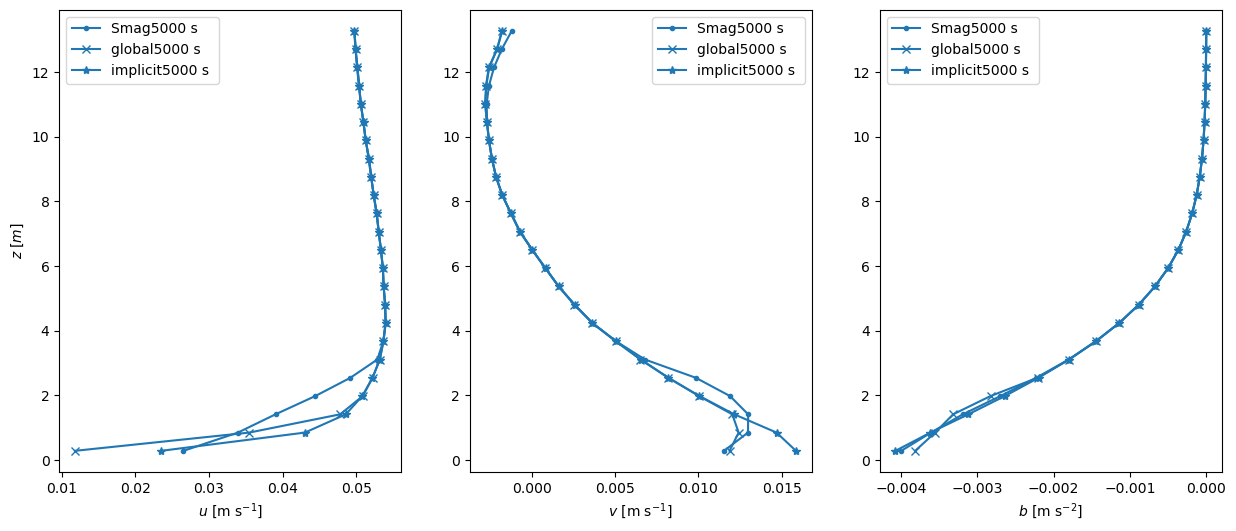

In [43]:
fig,ax = plt.subplots(1,3,figsize = (15,6))
# paths=['../cases/SBL_local_midReGridExtrap/','../cases/SBL_local_midReGridExtrap_deviatoric/']
# pathLabels=['full','deviatoric']
paths=['../cases/SBL_local_midReGridExtrap_TKEfOnly/','../cases/SBL_local_midReGridExtrap_deviatoric/']
pathLabels=['TKEf','all f']
paths=['../cases/SBL_local_midReGridExtrap_deviatoric/','../cases/SBL_local_midReGridExtrap_ucTKE_TKEfTau/']
pathLabels=['all f','ucTKE']
paths=['../cases/SBL_smag_midReGridExtrap/','../cases/SBL_global_midReGridExtrap_bf/','../cases/SBL_implicit/']
pathLabels=['Smag','global','implicit']
varStrings=['u','v','b']
varLabelStrings=[r'$u$ [m s$^{-1}$]',r'$v$ [m s$^{-1}$]',r'$b$ [m s$^{-2}$]']
itimes=[35]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['.','x','*']
for ifile in range(len(paths)): #tdqm notebook just draws progress bar
    marker=markers[ifile]
    file=paths[ifile]+'SBL1800.default.0014000.nc'

    stats = nc.Dataset(file, 'r')
    default = stats.groups['default']
    thermo = stats.groups['thermo']

    z = stats.variables['z'][:]
        
    for iv,varStr in enumerate(varStrings):

        for it,itime in enumerate(itimes):
            color=colors[it]
            
            try: 
                var=thermo.variables[varStr][itime, :]
            except:
                var=default.variables[varStr][itime, :]
            #t = stats.variables['time'][itime]
            #ax[iv].plot(var[zstart:zend], z[zstart:zend],'.-',label=str(t))

            ax[iv].plot(var[zstart:zend], z[zstart:zend],color=color,marker=marker,label=pathLabels[ifile]+str(int(100*(15+itime)))+' s ')
        ax[iv].legend()
        ax[iv].set_xlabel(varLabelStrings[iv])#r'$b [m^2 s^{-2}]$')
    
    ax[0].set_ylabel(r'$z \; [m]$')
        

fig

In [9]:
plt.figure(fig)
fmt="png"
plt.savefig("Profile_compareInitFinal."+fmt, format=fmt)